In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("depression_dataset_treated.csv")

In [3]:
df.head()

,Age,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student,Satisfaction,Pressure
0,37,7.605,7.5,2,0,6,2,0,0,0,1,4.0,2.0
1,60,7.605,5.5,1,1,0,4,1,0,1,1,3.0,4.0
2,42,7.605,5.5,2,0,0,2,0,0,0,1,3.0,2.0
3,44,7.605,7.5,3,1,1,2,1,0,0,1,5.0,3.0
4,48,7.605,7.5,2,1,6,5,1,0,1,1,3.0,4.0


In [4]:
# Converter colunas float para int para modelagem

df['Sleep Duration'] = df['Sleep Duration'].astype(int)
df['CGPA'] = df['CGPA'].astype(int)

In [5]:
# Separar variáveis dependentes e independentes

x = df.drop(columns=['Depression'])
y = df.Depression

In [6]:
# Dividir o conjunto de dados

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# Iniciar modelo e treinar

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=[0, 1, 2])
model.fit(X_train, y_train)  
predictions = model.predict(X_test)  

0:	learn: 0.5934564	total: 50.6ms	remaining: 50.6s
1:	learn: 0.4870043	total: 55.1ms	remaining: 27.5s
2:	learn: 0.4191390	total: 57.4ms	remaining: 19.1s
3:	learn: 0.3674369	total: 59.4ms	remaining: 14.8s
4:	learn: 0.3501419	total: 60.8ms	remaining: 12.1s
5:	learn: 0.3175245	total: 64.2ms	remaining: 10.6s
6:	learn: 0.2901453	total: 66.3ms	remaining: 9.41s
7:	learn: 0.2680352	total: 71.4ms	remaining: 8.86s
8:	learn: 0.2478325	total: 73.8ms	remaining: 8.12s
9:	learn: 0.2335537	total: 76.8ms	remaining: 7.61s
10:	learn: 0.2179289	total: 79ms	remaining: 7.1s
11:	learn: 0.2079077	total: 81.3ms	remaining: 6.69s
12:	learn: 0.2010482	total: 83.8ms	remaining: 6.36s
13:	learn: 0.1957454	total: 87.2ms	remaining: 6.14s
14:	learn: 0.1902100	total: 90.3ms	remaining: 5.93s
15:	learn: 0.1867002	total: 92.6ms	remaining: 5.7s
16:	learn: 0.1814191	total: 95.1ms	remaining: 5.5s
17:	learn: 0.1742113	total: 97.6ms	remaining: 5.32s
18:	learn: 0.1721101	total: 103ms	remaining: 5.34s
19:	learn: 0.1663095	total: 

In [8]:
# Calcular acurácia

accuracy = accuracy_score(y_test, predictions)
accuracy

0.9674054758800521

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       630
           1       0.91      0.91      0.91       137

    accuracy                           0.97       767
   macro avg       0.95      0.94      0.94       767
weighted avg       0.97      0.97      0.97       767



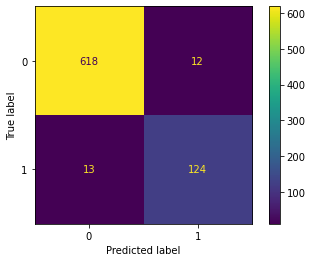

In [10]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [11]:
y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)  
roc_auc = auc(fpr, tpr)  

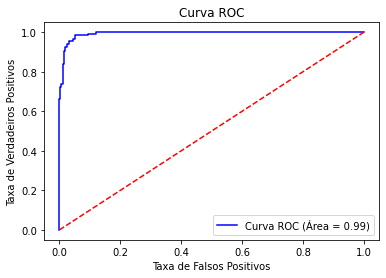

In [12]:
plt.figure()  
plt.plot(fpr, tpr, color='blue', label='Curva ROC (Área = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('Taxa de Falsos Positivos')  
plt.ylabel('Taxa de Verdadeiros Positivos')  
plt.title('Curva ROC')  
plt.legend(loc='lower right')  
plt.show()  